### Financial Modelling for stocks/crypto trading and holding.
#### This proyect own: Alejandro Zamora Esquivel.
##### ----------------------------------------------------

<p><img alt="Yahoo logo" height="45px" src="https://uxwing.com/wp-content/themes/uxwing/download/10-brands-and-social-media/yahoo.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Extract data from Yahoo Finance</h1>

In [2]:
#Install Yahoo Finance Library.
!pip install yfinance

     |████████████████████████████████| 6.3 MB 39.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Import Yahoo Finance Library.
import yfinance as yf

# Call the Apple Inc. (stock).
aapl = yf.Ticker('aapl')
hist = aapl.history(period="max", auto_adjust=True)

#Print history of stocks prices.
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.478481,0.480558,0.478481,0.478481,117258400,0.0,0.0
1980-12-15,0.453517,0.455594,0.453517,0.453517,43971200,0.0,0.0
1980-12-16,0.420232,0.422309,0.420232,0.420232,26432000,0.0,0.0
1980-12-17,0.430630,0.432707,0.430630,0.430630,21610400,0.0,0.0
1980-12-18,0.443119,0.445195,0.443119,0.443119,18362400,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-07,169.080002,171.580002,168.339996,171.179993,120405352,0.0,0.0
2021-12-08,172.125000,175.960007,170.699997,175.080002,116998901,0.0,0.0
2021-12-09,174.910004,176.750000,173.919998,174.559998,108923739,0.0,0.0


In [5]:
#Import other librarys for visualization and management data.
import matplotlib.pyplot as plt
import pandas as pd

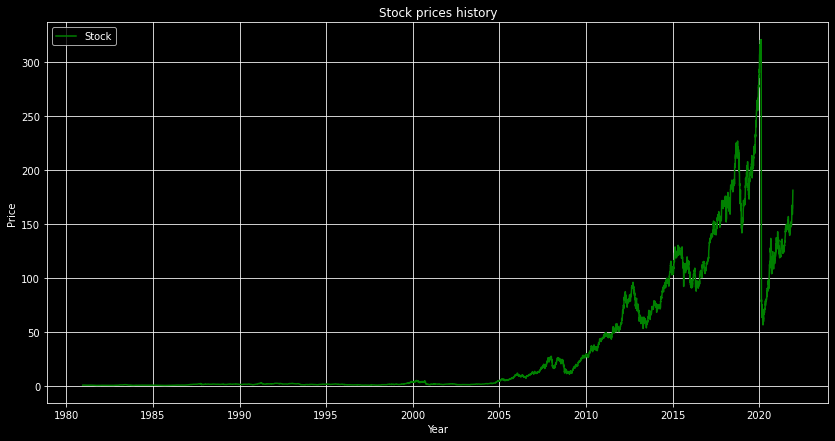

In [18]:
#Print the stock conduct
with plt.style.context('dark_background'):
  plt.ylabel('Price')
  plt.xlabel('Year')
  plt.grid(axis='both')
  plt.plot(hist.Open, 'green', label="Stock")
  plt.rcParams["figure.figsize"] = (14, 7)
  plt.title("Stock prices history")
  plt.legend() 
plt.show()

<p><img alt="Yahoo logo" height="45px" src="https://uxwing.com/wp-content/themes/uxwing/download/10-brands-and-social-media/yahoo.png" align="left" hspace="10px" vspace="0px"></p>
<h1>Machine Learning with Yahoo Finance data</h1>

In [20]:
#Convert data from Yahoo Finance in dataframe with Pandas.
df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
10327,2021-12-07,171.179993
10328,2021-12-08,175.080002
10329,2021-12-09,174.559998
10330,2021-12-10,179.449997
10331,2021-12-13,178.266998


In [21]:
#Import Prophet: 
'''Prophet is a procedure for forecasting time series data based 
on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
from fbprophet import Prophet'''
m = Prophet(daily_seasonality=False)
m.fit(df)

In [22]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
10690,2022-12-07,191.790828,165.135694,213.874689
10691,2022-12-08,191.964634,165.022478,217.726467
10692,2022-12-09,192.045585,165.256884,216.681236
10693,2022-12-10,192.063829,164.874380,218.273468
10694,2022-12-11,192.109149,164.314608,217.433982
10695,2022-12-12,192.091194,165.133701,217.488474
10696,2022-12-13,192.125962,168.722154,218.140253


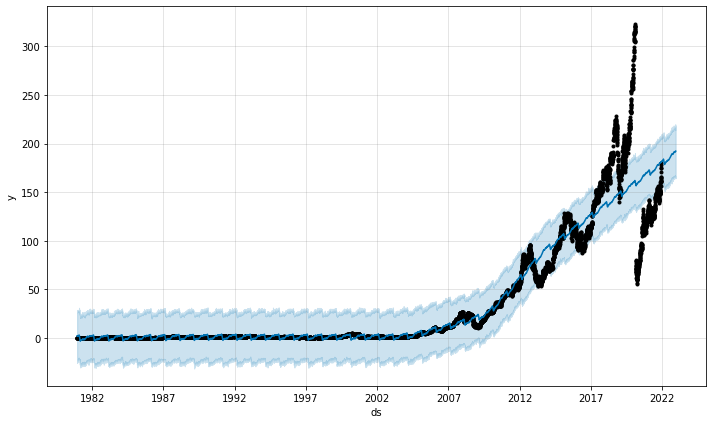

In [31]:
m.plot(forecast);

In [32]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-12,0.405735,-25.093130,26.586003,0.405735,0.405735,1.807551,1.807551,1.807551,0.070145,0.070145,0.070145,1.737406,1.737406,1.737406,0.0,0.0,0.0,2.213286
1,1980-12-15,0.406444,-22.819562,28.905984,0.406444,0.406444,1.793588,1.793588,1.793588,-0.022378,-0.022378,-0.022378,1.815966,1.815966,1.815966,0.0,0.0,0.0,2.200032
2,1980-12-16,0.406681,-23.653364,28.641682,0.406681,0.406681,1.808291,1.808291,1.808291,-0.038590,-0.038590,-0.038590,1.846881,1.846881,1.846881,0.0,0.0,0.0,2.214971
3,1980-12-17,0.406917,-24.203697,28.969322,0.406917,0.406917,1.768921,1.768921,1.768921,-0.110388,-0.110388,-0.110388,1.879309,1.879309,1.879309,0.0,0.0,0.0,2.175838
4,1980-12-18,0.407153,-23.965559,28.535789,0.407153,0.407153,1.940374,1.940374,1.940374,0.027768,0.027768,0.027768,1.912606,1.912606,1.912606,0.0,0.0,0.0,2.347527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,2022-06-07,184.732164,158.675699,207.918398,184.707890,184.793464,-1.638471,-1.638471,-1.638471,-0.038590,-0.038590,-0.038590,-1.599881,-1.599881,-1.599881,0.0,0.0,0.0,183.093693
10508,2022-06-08,184.762011,158.692946,208.149501,184.737256,184.826124,-1.727658,-1.727658,-1.727658,-0.110388,-0.110388,-0.110388,-1.617270,-1.617270,-1.617270,0.0,0.0,0.0,183.034353
10509,2022-06-09,184.791858,158.014991,209.908631,184.766105,184.857614,-1.610048,-1.610048,-1.610048,0.027768,0.027768,0.027768,-1.637815,-1.637815,-1.637815,0.0,0.0,0.0,183.181811
10510,2022-06-10,184.821706,156.637802,208.333002,184.794750,184.889890,-1.590618,-1.590618,-1.590618,0.070145,0.070145,0.070145,-1.660763,-1.660763,-1.660763,0.0,0.0,0.0,183.231088


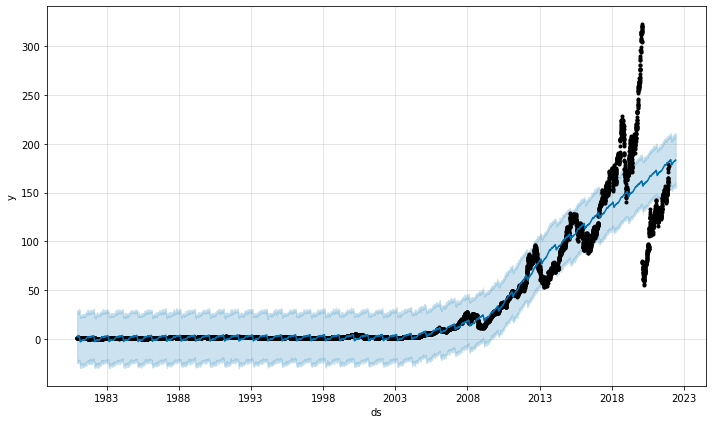

In [33]:
#Make forecast with Apple Inc. Stocks. 
make_forecast('AAPL', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6910,2023-12-09,4599.702249,4411.247257,4769.387052,4530.579635,4674.925597,-6.886319,-6.886319,-6.886319,4.936246,4.936246,4.936246,-11.822565,-11.822565,-11.822565,0.0,0.0,0.0,4592.815930
6911,2023-12-10,4601.245560,4414.975491,4771.004937,4531.985894,4676.635294,-7.560037,-7.560037,-7.560037,4.936247,4.936247,4.936247,-12.496283,-12.496283,-12.496283,0.0,0.0,0.0,4593.685523
6912,2023-12-11,4602.788871,4404.415768,4767.453406,4533.376612,4678.344991,-16.492376,-16.492376,-16.492376,-3.352209,-3.352209,-3.352209,-13.140167,-13.140167,-13.140167,0.0,0.0,0.0,4586.296495
6913,2023-12-12,4604.332182,4393.024444,4758.376582,4534.767330,4680.169167,-15.059532,-15.059532,-15.059532,-1.312240,-1.312240,-1.312240,-13.747292,-13.747292,-13.747292,0.0,0.0,0.0,4589.272650
6914,2023-12-13,4605.875493,4414.971696,4761.172722,4536.158048,4682.078172,-15.051814,-15.051814,-15.051814,-0.740115,-0.740115,-0.740115,-14.311700,-14.311700,-14.311700,0.0,0.0,0.0,4590.823678


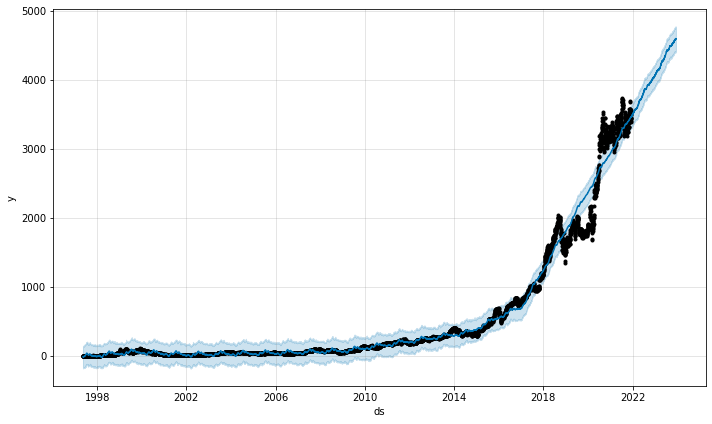

In [34]:
#Make forecast with AMAZON Inc. Stocks. 
make_forecast('AMZN', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
2886,2021-12-14,879.263733,784.270295,973.878253
2887,2021-12-15,879.291057,787.237879,973.278642
2888,2021-12-16,880.166124,789.096686,970.837938
2889,2021-12-17,880.447651,787.002799,973.431947
2890,2021-12-18,885.345194,797.272906,983.694203
...,...,...,...,...
3246,2022-12-09,1169.906789,1056.355105,1274.161537
3247,2022-12-10,1174.485970,1062.400906,1281.281384
3248,2022-12-11,1174.812848,1064.271615,1279.683126
3249,2022-12-12,1171.919174,1059.496998,1275.590785


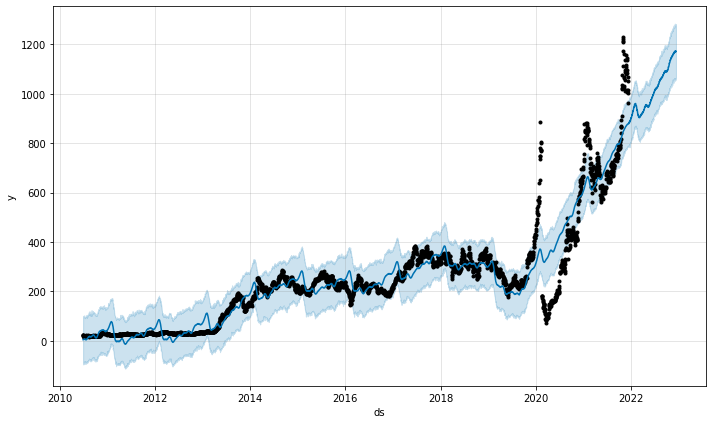

In [39]:
n = 365  # set variable for number of days to predict

# TESLA
tesla_forecast = make_forecast('TSLA', n)

# only keep the future forecast, and forget most columns
tesla_forecast = tesla_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

tesla_forecast